In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn import decomposition
from sklearn import datasets
import sklearn as sk

%matplotlib inline

In [2]:
# importando dataset
df = pd.read_csv('creditcard.csv')

In [3]:
# verificando estrutura de dados
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# obtendo estatisticas basicas do dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# extraçao dos nomes das propriedades
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# verificacao da ausencia de dados no dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# verificacao de informacoes basicas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
# estatisticas basicas das fraudes no dataset
print ("Fraud")
print (df.Amount[df.Class == 1].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [9]:
# estatisticas basicas das transacoes normais no dataset
print ("Normal")
print (df.Amount[df.Class == 0].describe())

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


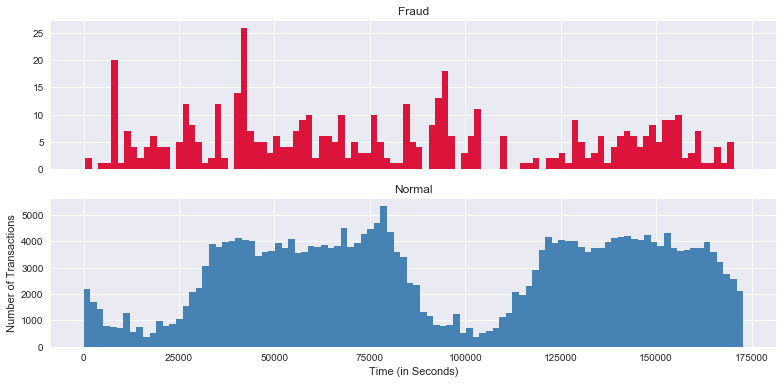

In [10]:
# visualizacao do numero de transacoes fraudulentas e normais ao longo do tempo
# para avaliar se existe relacao entre os gastos e sua distribuiçao temporal
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(13,6))

bins = 100

ax1.hist(df.Time[df.Class == 1], bins = bins, color='crimson')
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins, color='steelblue')
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

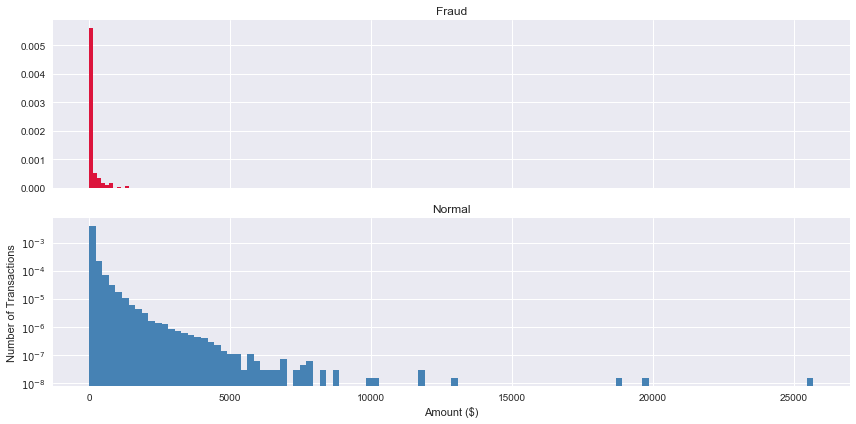

In [11]:
# visualizacao da ordem de grandeza das transacoes relacionado com o numero de operacoes
# com determinada magnitude
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,6))
ax1, ax2 = axes.flatten()

bins_f = 15
bins_n = 110

ax1.hist(df.Amount[df.Class == 1], bins_f, normed=1, histtype='bar', stacked=True, color='crimson')
ax1.set_title('Fraud')
plt.ylabel('Number of Transactions')

ax2.hist(df.Amount[df.Class == 0], bins_n, normed=1, histtype='bar', stacked=True, color='steelblue')
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.yscale('log')
fig.tight_layout()
plt.show()

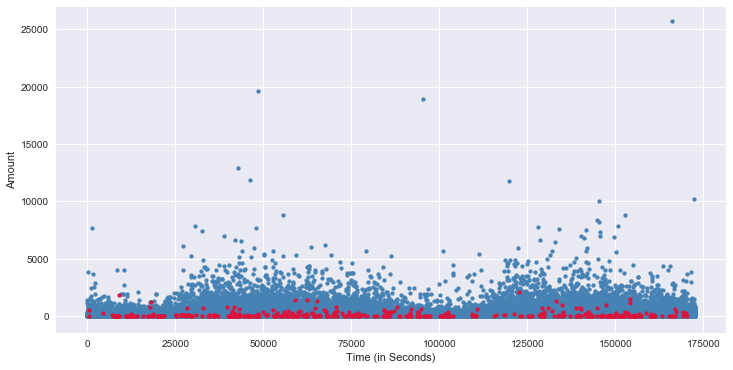

In [12]:
# visualizacao da relacao entre valores de transacoes ao longo do tempo
f, ax2 = plt.subplots(1, 1, sharex=True, figsize=(12,6))

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0], s=15, color='steelblue')
#ax2.set_title('Normal')

ax2.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1], s=15, color='crimson')
#ax1.set_title('Fraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')

plt.show()

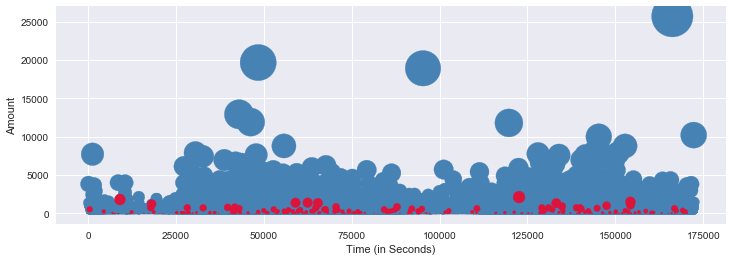

In [13]:
# visualizacao da relacao entre valores de transacoes ao longo do tempo com enfoque no valor
f, ax2 = plt.subplots(1, 1, sharex=True, figsize=(12,4))

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0], s=df.Amount[df.Class == 0]/15, color='steelblue')
#ax2.set_title('Normal')

ax2.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1], s=df.Amount[df.Class == 1]/15, color='crimson')
#ax1.set_title('Fraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')

plt.show()

In [14]:
#Select only the anonymized features.
v_features = df.ix[:,1:29].columns

/Users/paulolomeu/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


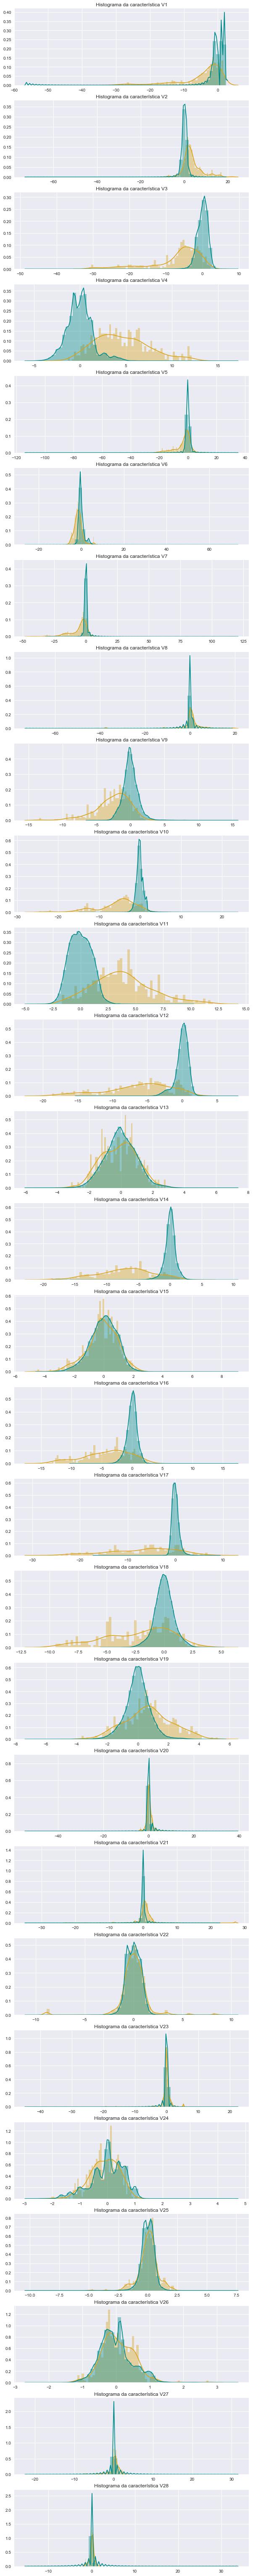

In [15]:
# visualizacao das propriedade anonimizadas 

import matplotlib.gridspec as grd

bins_f = 60
bins_n = 60

plt.figure(figsize=(10,28*4))
gs = grd.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=bins_f, color='goldenrod')
    sns.distplot(df[cn][df.Class == 0], bins=bins_n, color='darkcyan')
    ax.set_xlabel('')
    ax.set_title('Histograma da característica ' + str(cn))
plt.show()

In [16]:
#Create a new feature for normal (non-fraudulent) transactions.
df.loc[df.Class == 0, 'Normal'] = 1
df.loc[df.Class == 1, 'Normal'] = 0

In [17]:
#Rename 'Class' to 'Fraud'.
df = df.rename(columns={'Class': 'Fraud'})

In [18]:
#492 fraudulent transactions, 284,315 normal transactions.
#0.172% of transactions were fraud. 
print(df.Normal.value_counts())
print()
print(df.Fraud.value_counts())

1.0    284315
0.0       492
Name: Normal, dtype: int64

0    284315
1       492
Name: Fraud, dtype: int64


In [19]:
pd.set_option("display.max_columns",101)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud,Normal
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1.0


In [20]:
#Create dataframes of only Fraud and Normal transactions.
Fraud = df[df.Fraud == 1]
Normal = df[df.Normal == 1]

In [21]:
Fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud,Normal
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,0.0
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,0.0
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,0.0
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,0.0
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,0.0


In [22]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 541 to 281674
Data columns (total 32 columns):
Time      492 non-null float64
V1        492 non-null float64
V2        492 non-null float64
V3        492 non-null float64
V4        492 non-null float64
V5        492 non-null float64
V6        492 non-null float64
V7        492 non-null float64
V8        492 non-null float64
V9        492 non-null float64
V10       492 non-null float64
V11       492 non-null float64
V12       492 non-null float64
V13       492 non-null float64
V14       492 non-null float64
V15       492 non-null float64
V16       492 non-null float64
V17       492 non-null float64
V18       492 non-null float64
V19       492 non-null float64
V20       492 non-null float64
V21       492 non-null float64
V22       492 non-null float64
V23       492 non-null float64
V24       492 non-null float64
V25       492 non-null float64
V26       492 non-null float64
V27       492 non-null float64
V28       492 non-null

In [23]:
Normal.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud,Normal
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1.0


In [24]:
# Set X_train equal to 80% of the fraudulent transactions.
X_train = Fraud.sample(frac=0.8)
count_Frauds = len(X_train)

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 8296 to 64329
Data columns (total 32 columns):
Time      394 non-null float64
V1        394 non-null float64
V2        394 non-null float64
V3        394 non-null float64
V4        394 non-null float64
V5        394 non-null float64
V6        394 non-null float64
V7        394 non-null float64
V8        394 non-null float64
V9        394 non-null float64
V10       394 non-null float64
V11       394 non-null float64
V12       394 non-null float64
V13       394 non-null float64
V14       394 non-null float64
V15       394 non-null float64
V16       394 non-null float64
V17       394 non-null float64
V18       394 non-null float64
V19       394 non-null float64
V20       394 non-null float64
V21       394 non-null float64
V22       394 non-null float64
V23       394 non-null float64
V24       394 non-null float64
V25       394 non-null float64
V26       394 non-null float64
V27       394 non-null float64
V28       394 non-null

In [79]:
# Add 80% of the normal transactions to X_train.
X_train = pd.concat([X_train, Normal.sample(frac = 0.8)], axis = 0)

# X_test contains all the transaction not in X_train.
X_test = df.loc[~df.index.isin(X_train.index)]

In [80]:
from sklearn.utils import shuffle

#Shuffle the dataframes so that the training is done in a random order.
X_train = shuffle(X_train)
X_test = shuffle(X_test)

In [81]:
#Add our target features to y_train and y_test.
y_train = X_train.Fraud
y_train = pd.concat([y_train, X_train.Normal], axis=1)

y_test = X_test.Fraud
y_test = pd.concat([y_test, X_test.Normal], axis=1)

In [82]:
#Drop target features from X_train and X_test.
X_train = X_train.drop(['Fraud','Normal'], axis = 1)
X_test = X_test.drop(['Fraud','Normal'], axis = 1)

In [83]:
#Check to ensure all of the training/testing dataframes are of the correct length
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

227846
227846
56961
56961


In [84]:
'''
Due to the imbalance in the data, ratio will act as an equal weighting system for our model. 
By dividing the number of transactions by those that are fraudulent, ratio will equal the value that when multiplied
by the number of fraudulent transactions will equal the number of normal transaction. 
Simply put: # of fraud * ratio = # of normal
'''
ratio = len(X_train)/count_Frauds 

y_train.Fraud *= ratio
y_test.Fraud *= ratio

In [85]:
# Split the testing data into validation and testing sets
split = int(len(y_test)/2)

inputX = X_train.as_matrix()
inputY = y_train.as_matrix()
inputX_valid = X_test.as_matrix()[:split]
inputY_valid = y_test.as_matrix()[:split]
inputX_test = X_test.as_matrix()[split:]
inputY_test = y_test.as_matrix()[split:]

In [86]:
import tensorflow as tf

# Number of input nodes.
input_nodes = 37

# Multiplier maintains a fixed ratio of nodes between each layer.
mulitplier = 1.5 

# Number of nodes in each hidden layer
hidden_nodes1 = 18
hidden_nodes2 = round(hidden_nodes1 * mulitplier)
hidden_nodes3 = round(hidden_nodes2 * mulitplier)

# Percent of nodes to keep during dropout.
pkeep = tf.placeholder(tf.float32)

In [87]:
# input
x = tf.placeholder(tf.float32, [None, input_nodes])

# layer 1
W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.15))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

# layer 2
W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev = 0.15))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.sigmoid(tf.matmul(y1, W2) + b2)

# layer 3
W3 = tf.Variable(tf.truncated_normal([hidden_nodes2, hidden_nodes3], stddev = 0.15)) 
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.sigmoid(tf.matmul(y2, W3) + b3)
y3 = tf.nn.dropout(y3, pkeep)

# layer 4
W4 = tf.Variable(tf.truncated_normal([hidden_nodes3, 2], stddev = 0.15)) 
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)

# output
y = y4
y_ = tf.placeholder(tf.float32, [None, 2])

In [88]:
# Parameters
training_epochs = 5 # should be 2000, it will timeout when uploading
training_dropout = 0.9
display_step = 1 # 10 
n_samples = y_train.shape[0]
batch_size = 2048
learning_rate = 0.005

In [89]:
# Cost function: Cross Entropy
cost = -tf.reduce_sum(y_ * tf.log(y))

# We will optimize our model via AdamOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Correct prediction if the most likely value (Fraud or Normal) from softmax equals the target value.
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [90]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

accuracy_summary = [] # Record accuracy values for plot
cost_summary = [] # Record cost values for plot
valid_accuracy_summary = [] 
valid_cost_summary = [] 
stop_early = 0 # To keep track of the number of epochs before early stopping

# Save the best weights so that they can be used to make the final predictions
#checkpoint = "location_on_your_computer/best_model.ckpt"
saver = tf.train.Saver(max_to_keep=1)

In [91]:

# Initialize variables and tensorflow session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): 
        for batch in range(int(n_samples/batch_size)):
            batch_x = inputX[batch*batch_size : (1+batch)*batch_size]
            batch_y = inputY[batch*batch_size : (1+batch)*batch_size]

            sess.run([optimizer], feed_dict={x: batch_x, 
                                             y_: batch_y,
                                             pkeep: training_dropout})

        # Display logs after every 10 epochs
        if (epoch) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={x: inputX, 
                                                                            y_: inputY,
                                                                            pkeep: training_dropout})

            valid_accuracy, valid_newCost = sess.run([accuracy, cost], feed_dict={x: inputX_valid, 
                                                                                  y_: inputY_valid,
                                                                                  pkeep: 1})

            print ("Epoch:", epoch,
                   "Acc =", "{:.5f}".format(train_accuracy), 
                   "Cost =", "{:.5f}".format(newCost),
                   "Valid_Acc =", "{:.5f}".format(valid_accuracy), 
                   "Valid_Cost = ", "{:.5f}".format(valid_newCost))
            
            # Save the weights if these conditions are met.
            #if epoch > 0 and valid_accuracy > max(valid_accuracy_summary) and valid_accuracy > 0.999:
            #    saver.save(sess, checkpoint)
            
            # Record the results of the model
            accuracy_summary.append(train_accuracy)
            cost_summary.append(newCost)
            valid_accuracy_summary.append(valid_accuracy)
            valid_cost_summary.append(valid_newCost)
            
            # If the model does not improve after 15 logs, stop the training.
            if valid_accuracy < max(valid_accuracy_summary) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    break
            else:
                stop_early = 0
            
    print()
    print("Optimization Finished!")
    print()   
    
#with tf.Session() as sess:
    # Load the best weights and show its results
    #saver.restore(sess, checkpoint)
    #training_accuracy = sess.run(accuracy, feed_dict={x: inputX, y_: inputY, pkeep: training_dropout})
    #validation_accuracy = sess.run(accuracy, feed_dict={x: inputX_valid, y_: inputY_valid, pkeep: 1})
    
    #print("Results using the best Valid_Acc:")
    #print()
    #print("Training Accuracy =", training_accuracy)
    #print("Validation Accuracy =", validation_accuracy)

ValueError: Cannot feed value of shape (2048, 30) for Tensor 'Placeholder_4:0', which has shape '(?, 37)'

In [51]:
writer = pd.ExcelWriter('output.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

In [98]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Fraud', 'Normal'],
      dtype='object')

In [99]:
from bokeh.charts import BoxPlot, output_file, show
#from bokeh.sampledata.autompg import autompg as df

# origin = the source of the data that makes up the autompg dataset
title = "MPG by Cylinders and Data Source, Colored by Cylinders"

# color by one dimension and label by two dimensions
# coloring by one of the columns visually groups them together
box_plot = BoxPlot(df, values=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
                   color=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], title=title)

output_file("boxplot_single.html", title="boxplot_single.py example")

show(box_plot)

ValueError: expected an element of either Column(Float) or Column(String), got array([[-1.35980713, -0.07278117,  2.53634674,  1.37815522, -0.33832077,
         0.46238778,  0.23959855,  0.0986979 ,  0.36378697,  0.09079417,
        -0.55159953, -0.61780086, -0.99138985, -0.31116935,  1.46817697,
        -0.47040053,  0.20797124,  0.02579058,  0.40399296,  0.2514121 ,
        -0.01830678,  0.27783758, -0.11047391,  0.06692807,  0.12853936,
        -0.18911484,  0.13355838, -0.02105305]])

In [100]:
from bokeh.charts import BoxPlot, output_file, show
#from bokeh.sampledata.autompg import autompg as df

# origin = the source of the data that makes up the autompg dataset
title = "MPG by Cylinders and Data Source, Colored by Cylinders"

# color by one dimension and label by two dimensions
# coloring by one of the columns visually groups them together
box_plot = BoxPlot(df, values=['V1', 'V2', 'V3'],
                   color=['V1', 'V2', 'V3'], title=title)

output_file("boxplot_single.html", title="boxplot_single.py example")

show(box_plot)

ValueError: expected an element of either Column(Float) or Column(String), got array([[-1.35980713, -0.07278117,  2.53634674]])

In [104]:
a=df.Amount.sum()

In [105]:
b=Fraud.Amount.sum()

In [106]:
c=Normal.Amount.sum()

In [186]:
10/100

0.1

In [187]:
b/2*30*12

10823034.599999994

In [111]:
b/a

0.0023895779399554454

In [114]:
df[df.Amount.ge(20000)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud,Normal
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.34736,-3.872425,-12.005487,6.853897,-9.189418,7.126883,-6.795942,8.877742,17.315112,-7.173805,-1.968044,5.501747,-54.49772,-21.62012,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0,1.0


In [122]:
np.shape(df[df.Amount.ge(20000)])

(1, 32)

In [123]:
np.shape(df[df.Amount.ge(10000)])

(8, 32)

In [124]:
np.shape(df[df.Amount.ge(5000)])

(55, 32)

In [125]:
np.shape(df)

(284807, 32)

In [128]:
55/284807

0.00019311323106524768

In [130]:
corr = df.corr()

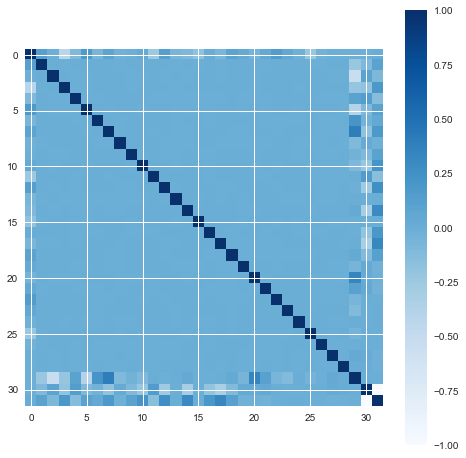

In [184]:
plt.figure(figsize=(8, 8))
plt.imshow(corr, cmap='Blues', interpolation='none')  
plt.colorbar()
plt.show()

In [135]:
dfbox = df

In [137]:
del dfbox['Time']

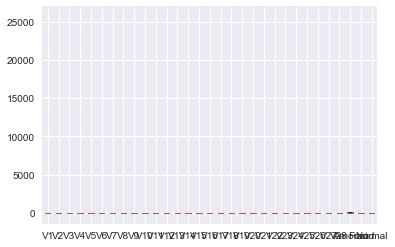

In [138]:
dfbox.boxplot()

In [140]:
del dfbox['Amount']

In [142]:
del dfbox['Fraud']

In [144]:
del dfbox['Normal']

(-5, 5)

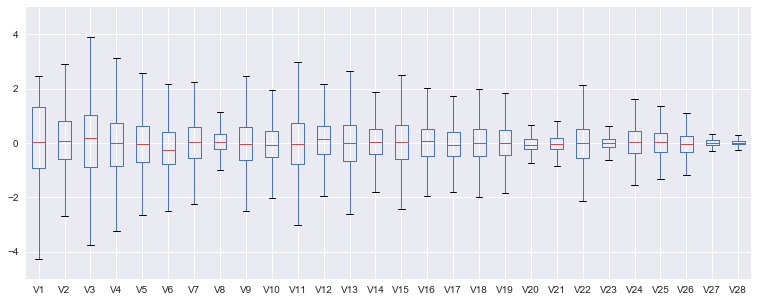

In [154]:
axes = dfbox.plot.box(figsize=(13,5), return_type='axes')
axes.set_ylim(-5, 5)

In [158]:
df.Amount.boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

In [160]:
valores = df.Amount

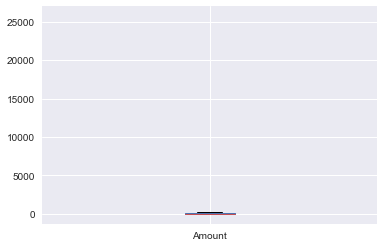

In [163]:
df.Amount.plot.box()

/Users/paulolomeu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: Tried to set a label via parameter 'y' in func 'scatter' but couldn't find such an argument. 
(This is a programming error, please report to the matplotlib list!)


TypeError: scatter() missing 1 required positional argument: 'y'

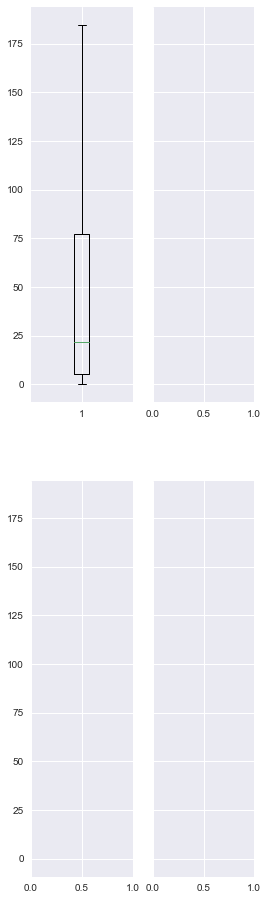

In [174]:
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(4, 16), sharey=True)
axes[0, 0].boxplot(df.Amount, showfliers=False)
axes[0, 0].scatter(df.Amount)
fig.subplots_adjust(hspace=0.4)
plt.show()

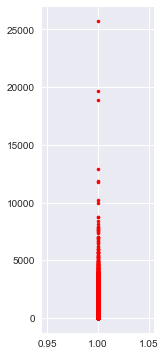

In [182]:
#flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
#                  linestyle='none')

plt.subplots(figsize=(2, 6), sharey=True)
plt.plot(np.ones(np.shape(df.Amount)[0]), df.Amount, 'r.')
#fig.subplots_adjust(hspace=0.4)
plt.show()

In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


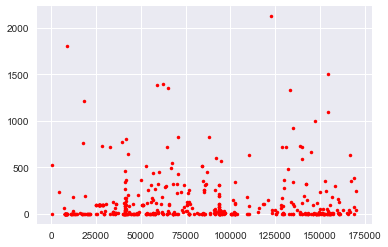

In [15]:
plt.plot(df.Time[df.Class == 1],df.Amount[df.Class == 1],'r.')

In [16]:
df.Amount[df.Class == 1].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
df.Amount[df.Class == 1].sum()

60127.96999999997

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


AttributeError: module 'seaborn' has no attribute 'get_axes'

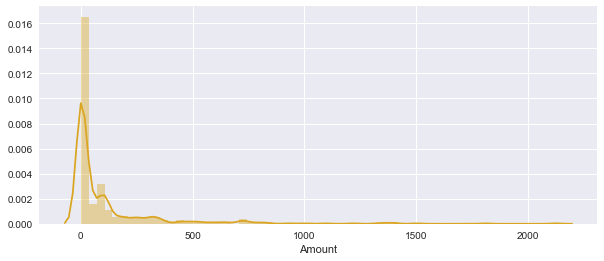

In [31]:
import matplotlib.gridspec as grd

bins_f = 60
bins_n = 60

plt.figure(figsize=(10,4))
gs = grd.GridSpec(28, 1)
#for i, cn in enumerate(df[v_features]):
#ax = plt.subplot(gs)
sns.distplot(df.Amount[df.Class == 1], bins=bins_f, color='goldenrod')
    #sns.distplot(df[cn][df.Class == 0], bins=bins_n, color='darkcyan')
#ax.set_xlabel('')
#ax.set_title('Histograma dos valores fraudados ')
sns.get_axes()[1].set_yscale('log')
plt.show()

In [21]:
media = np.mean(df.Amount[df.Class == 1])
print(media)

122.21132113821133


In [22]:
mediana = np.median(df.Amount[df.Class == 1])
print(mediana)

9.25


In [37]:
samdn = 0
new_vamdn = []
for item in df.Amount[df.Class == 1]:
    if item <= df.Amount[df.Class == 1].median():
        samdn = samdn + item
        new_vamdn.append(item)
print(samdn)

429.8


In [23]:
df.Amount[df.Class == 1].median()

9.25

In [36]:
samn = 0
new_vamn = []
for item in df.Amount[df.Class == 1]:
    if item <= df.Amount[df.Class == 1].mean():
        samn = samn + item
        new_vamn.append(item)
print(samn)

9199.54


In [35]:
samn/df.Amount[df.Class == 1].sum()

0.15299934456460129

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


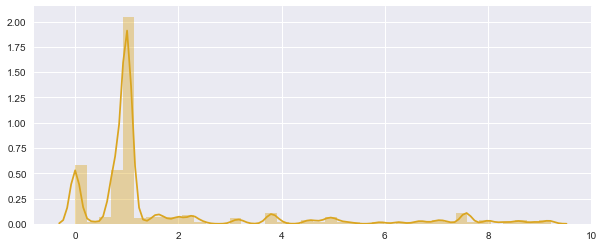

In [46]:
bins_f = 40
bins_n = 40

plt.figure(figsize=(10,4))
gs = grd.GridSpec(28, 1)

sns.distplot(new_vamdn, bins=bins_f, color='goldenrod')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


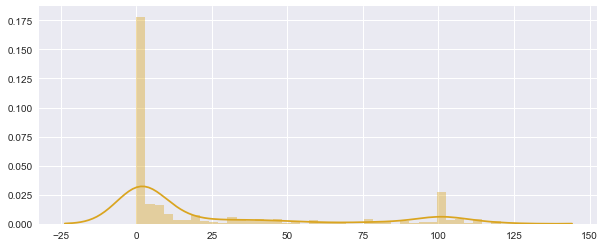

In [45]:
bins_f = 40
bins_n = 40

plt.figure(figsize=(10,4))
gs = grd.GridSpec(28, 1)
#for i, cn in enumerate(df[v_features]):
#ax = plt.subplot(gs)
sns.distplot(new_vamn, bins=bins_f, color='goldenrod')
    #sns.distplot(df[cn][df.Class == 0], bins=bins_n, color='darkcyan')
#ax.set_xlabel('')
#ax.set_title('Histograma dos valores fraudados ')
#sns.get_axes()[1].set_yscale('log')
plt.show()